# Interpretability

#### Imports

In [7]:
import pandas as pd
import pickle
import shap
import os

pd.set_option('display.max_columns', None)

## Load model

In [19]:
PATH = '../models/'

In [20]:
with open('../models/model.pkl', 'rb') as fpkl:
    model = pickle.load(fpkl)

## Load test data

In [21]:
PATH = '../data/processed/'
X_test = pd.read_csv(os.path.join(PATH, 'X_test.csv'), sep=',', index_col=0)
y_test = pd.read_csv(os.path.join(PATH, 'y_test.csv'), sep=',', index_col=0)
print(X_test.shape)

(950, 103)


## Shap

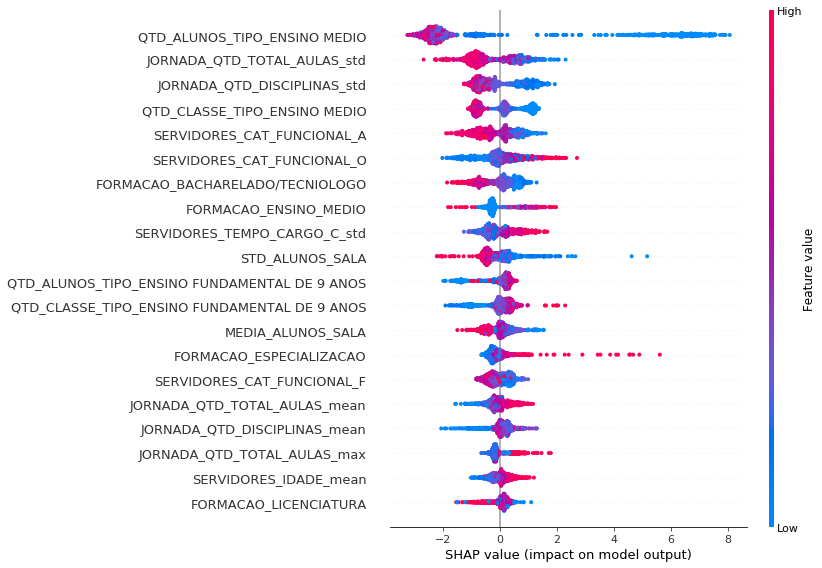

In [22]:
import shap 

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values[1], X_test)

In [9]:
X_test.iloc[:, 60:80].head()

,QTD_CLASSE_TIPO_CEL,QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_ALUNOS_TIPO_ENSINO MEDIO,QTD_ALUNOS_TIPO_CEL,JORNADA_QTD_DISCIPLINAS_mean,JORNADA_QTD_DISCIPLINAS_std,JORNADA_QTD_DISCIPLINAS_max,JORNADA_QTD_TOTAL_AULAS_mean,JORNADA_QTD_TOTAL_AULAS_std,JORNADA_QTD_TOTAL_AULAS_max,SERVIDORES_IDADE_mean,SERVIDORES_IDADE_std,SERVIDORES_TEMPO_CARGO_C_mean,SERVIDORES_TEMPO_CARGO_C_std,SERVIDORES_CAT_FUNCIONAL_A,SERVIDORES_CAT_FUNCIONAL_F,SERVIDORES_CAT_FUNCIONAL_N,SERVIDORES_CAT_FUNCIONAL_O,SERVIDORES_CAT_FUNCIONAL_P,RELACAO_ALUNO_POR_SERVIDOR
553,0.0,467.0,228.0,0.0,3.395349,1.416561,8.0,41.348837,21.535003,64.0,49.421875,10.768582,12.250000,8.746653,0.625000,0.156250,0.0,0.218750,0.0,15.840909
1613,0.0,354.0,446.0,0.0,4.171429,1.706143,10.0,50.285714,18.183010,64.0,41.833333,8.061942,9.409091,5.481342,0.484848,0.363636,0.0,0.151515,0.0,18.755556
4582,0.0,482.0,442.0,0.0,3.545455,1.485661,6.0,48.181818,17.715153,104.0,43.600000,8.063506,9.053333,4.648427,0.560000,0.293333,0.0,0.146667,0.0,18.117647
1424,0.0,0.0,847.0,0.0,3.250000,1.522875,8.0,43.541667,22.218411,84.0,47.941176,9.435759,9.764706,6.617861,0.808824,0.058824,0.0,0.132353,0.0,17.949153
2072,0.0,86.0,56.0,0.0,5.920000,3.718423,14.0,37.360000,20.548479,64.0,42.250000,9.952197,6.900000,5.563084,0.133333,0.500000,0.0,0.366667,0.0,5.354839


In [23]:
df_shap = pd.DataFrame(shap_values[1], columns=X_test.columns)

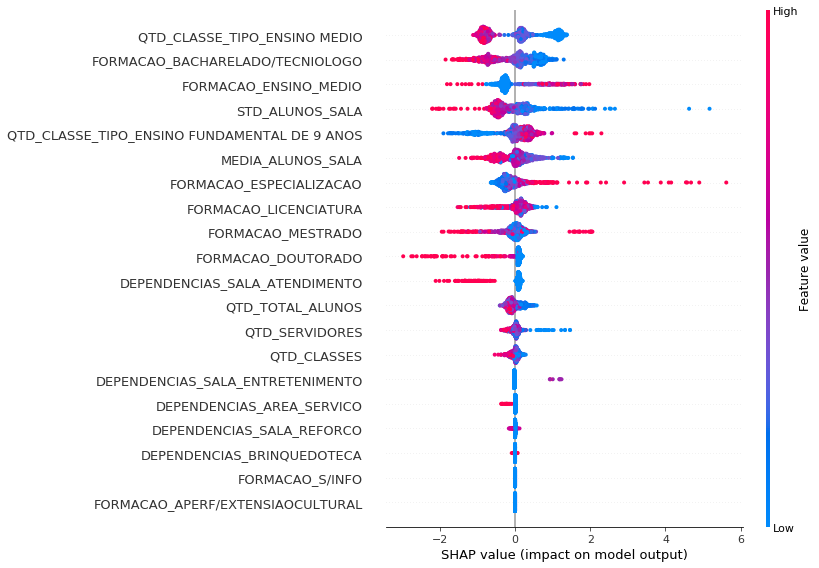

In [24]:
shap.summary_plot(df_shap.iloc[:, 40:60].values, X_test.iloc[:, 40:60])

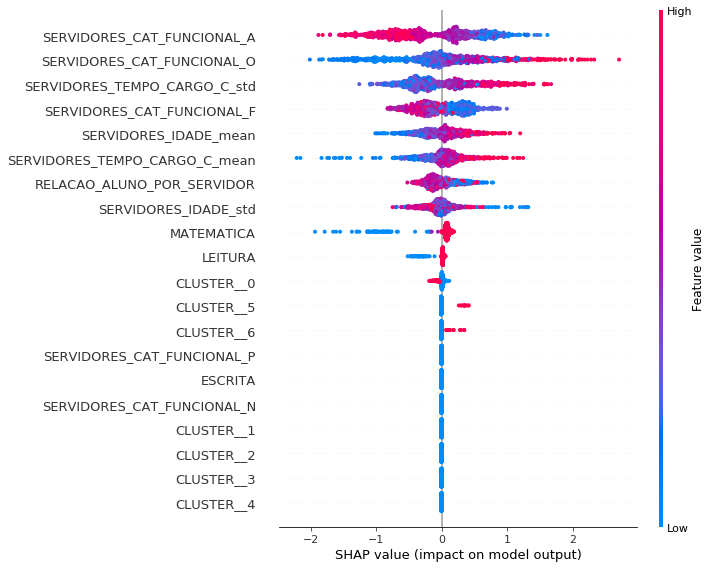

In [26]:
shap.summary_plot(df_shap.iloc[:, 70:90].values, X_test.iloc[:, 70:90])

In [14]:
X_test.columns

Index(['CAPITAL', 'AREA', 'ESTIMATED_POP', 'RURAL_URBAN', 'GVA_PUBLIC',
       ' GVA_TOTAL ', 'GDP', 'GDP_CAPITA', 'COMP_H', 'COMP_O', 'COMP_P',
       'COMP_Q', 'DEPENDENCIAS_SALAS_AULA', 'DEPENDENCIAS_SALA_RECURSO',
       'DEPENDENCIAS_TOT_SALAS_AULA', 'DEPENDENCIAS_CANTINA',
       'DEPENDENCIAS_COPA', 'DEPENDENCIAS_REFEITORIO',
       'DEPENDENCIAS_SALA_LEITURA', 'DEPENDENCIAS_TOT_SALA_LEITURA',
       'DEPENDENCIAS_TOT_QUADRA', 'DEPENDENCIAS_SALA_PROF',
       'DEPENDENCIAS_PATIO_COBERTO', 'DEPENDENCIAS_PATIO_DESCOBERTO',
       'DEPENDENCIAS_TOT_VESTIARIO', 'DEPENDENCIAS_LAB_INFO',
       'DEPENDENCIAS_LAB_CIENCIAS',
       'DEPENDENCIAS_LAB_CIENCIA_FISICA_BIOLOGICA',
       'DEPENDENCIAS_TOT_LAB_CIENCIA', 'DEPENDENCIAS_LAB_MULTIUSO',
       'DEPENDENCIAS_OFICINA', 'DEPENDENCIAS_DORMITORIO',
       'DEPENDENCIAS_SANITARIO_ADEQ_DEF', 'DEPENDENCIAS_SANITARIO_AL_MASC',
       'DEPENDENCIAS_SANITARIO_AL_FEM', 'DEPENDENCIAS_TOT_SANITARIO_AL',
       'DEPENDENCIAS_TOT_SANITARIO_FUNC',

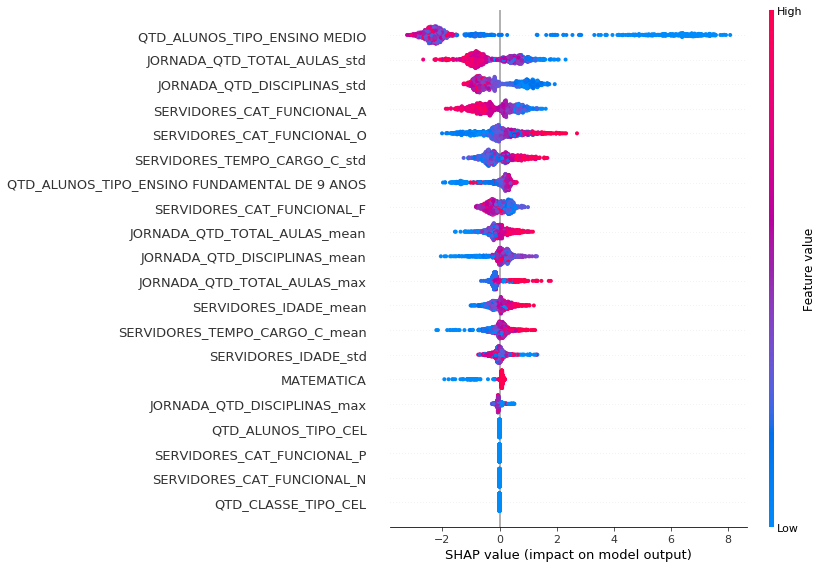

In [25]:
shap.summary_plot(df_shap.iloc[:, 60:80].values, X_test.iloc[:, 60:80])